In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [5]:
type(mnist.data)

pandas.core.frame.DataFrame

In [9]:
mnist.data.iloc[1,:].values.reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [10]:
mnist.data.iloc[1,:].min()

0.0

In [11]:
mnist.data.iloc[1,:].max()

255.0

In [14]:
type(mnist.target)

pandas.core.series.Series

In [16]:
mnist.target.values

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
mnist.target.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(mnist.data,
                                                 mnist.target,
                                                 test_size=0.1,
                                                 stratify=mnist.target)

In [22]:
rf_clf = RandomForestClassifier(n_estimators=500)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9735714285714285

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
n_test = len(X_test)
n_test

7000

In [25]:
random_pick = np.random.randint(0,n_test,10)
random_pick

array([6353, 4911, 1609, 4457, 4148, 4462, 6260,  139, 6781, 6871])

In [26]:
mnist.data.iloc[6353]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 6353, Length: 784, dtype: float64

In [27]:
mnist.target.iloc[6353]

'8'

['2', '2', '6', '2', '2', '8', '0', '2', '4', '7']


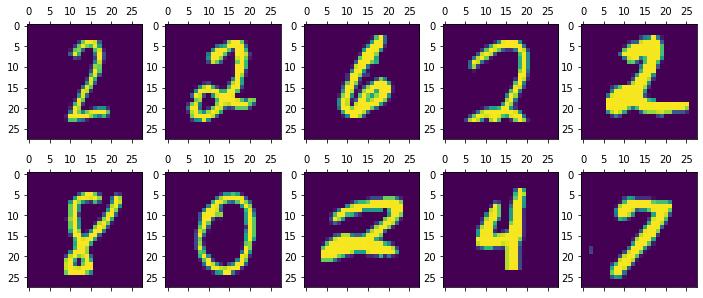

In [32]:
figure = plt.figure(figsize=(12,5))
axes=[]
for i in range(1,11):
    axes.append(figure.add_subplot(2,5,i))
    
tmp_list = []
for i in range(10):
    tmp = X_test.iloc[random_pick[i]]
    tmp = np.array(tmp).reshape(28,28)
    tmp_list.append(tmp)
    # print(type(tmp))
    
print(y_test.iloc[random_pick].tolist())
for i in range(10):
    axes[i].matshow(tmp_list[i])
    

In [33]:
import glob
from PIL import Image

['0']


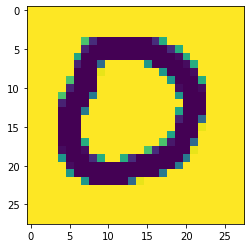

['1']


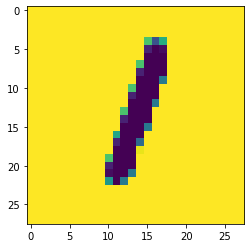

['2']


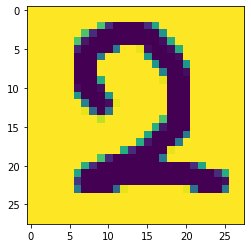

['3']


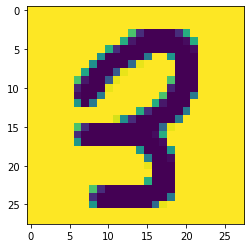

['4']


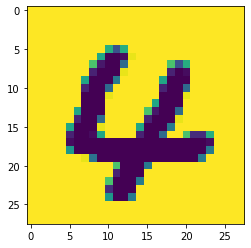

['5']


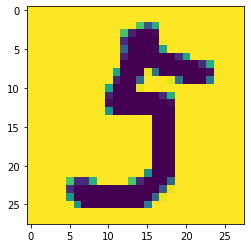

['8']


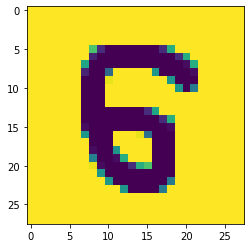

['2']


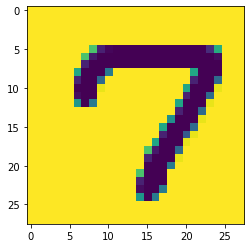

['3']


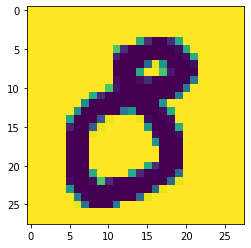

['9']


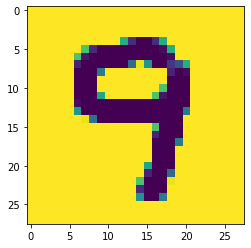

In [48]:
for image_path in glob.glob('./data/*.png'):
    # print(image_path)
    img = Image.open(image_path).convert('L')
    plt.imshow(img)
    # print(img)
    # print(np.resize(img,(1,784)))
    img = np.resize(img,(1,784))
    img = 255-img
    # print(img)
    pred = rf_clf.predict(img)
    print(pred)
    plt.show()

In [49]:
import pickle

In [52]:
f = open('model.pickle','wb')
pickle.dump(rf_clf,f)
f.close()

In [55]:
f = open('model.pickle','rb')
model = pickle.load(f)
f.close()

['1']


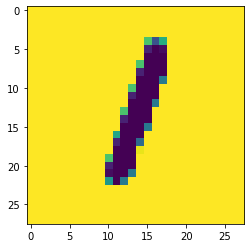

In [56]:
img = Image.open('./data/1.png').convert('L')
plt.imshow(img)
img = np.resize(img,(1,784))
img = 255-img
pred = model.predict(img)
print(pred)
plt.show()